In [1]:
import pandas as pd

file = '/home/prateek/shared/TusharIR/Reviews.csv'

df = pd.read_csv(file)

In [2]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
data = df[['Text', 'Summary']]

data

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy
...,...,...
568449,Great for sesame chicken..this is a good if no...,Will not do without
568450,I'm disappointed with the flavor. The chocolat...,disappointed
568451,"These stars are small, so you can give 10-15 o...",Perfect for our maltipoo
568452,These are the BEST treats for training and rew...,Favorite Training and reward treat


In [4]:
data.shape

(568454, 2)

In [5]:
data = data.dropna()

data.shape

(568427, 2)

In [6]:
dataset = data[:2000]

dataset.shape

(2000, 2)

In [7]:
dataset['Text'][100]

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [8]:
from transformers import pipeline

pipe = pipeline("text-generation", model="gpt2")

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
train_df, test_df = train_test_split(dataset, test_size=0.25, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [10]:
train_df.shape

(1500, 2)

In [11]:
import re

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove extra blank spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading and trailing whitespaces
    text = text.strip()
    return text

In [12]:
input_index = 12

In [13]:
input_text = train_df['Text'][input_index]

input_text

"The chips were great...for the first few bags. However, after the first bag or two, I noticed that the remaining bags were damaged. There were holes in each bag and black, sticky stains on the outside. Other reviewers who bought around the same time that I did are now claiming that they found rodent holes in their bags of chips.<br /><br />The chips came in a sealed Kettle box, so it's hard to say who screwed up. But someone somewhere screwed up. These chips were a health hazard before the holes in the bag. Now? It's like a game of roulette."

In [14]:
print(preprocess_text(input_text))


The chips were great...for the first few bags. However, after the first bag or two, I noticed that the remaining bags were damaged. There were holes in each bag and black, sticky stains on the outside. Other reviewers who bought around the same time that I did are now claiming that they found rodent holes in their bags of chips.The chips came in a sealed Kettle box, so it's hard to say who screwed up. But someone somewhere screwed up. These chips were a health hazard before the holes in the bag. Now? It's like a game of roulette.


In [15]:
query = input_text + "\nTL;DR:\n"

pipe_out = pipe(query, max_length=512, clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [16]:
text = pipe_out[0]['generated_text'][len(query):]

print(text)


You want in on the action by using the chips instead of the chips. You also want to get the game to look great. You're basically trying to buy a good deal when you consider buying two full sized bags, or an older 4oz bag that you can buy for $20 after the chips have been shipped.


In [17]:
# Ground Truth
output_text = train_df['Summary'][input_index]

print(output_text)

The bags were damaged with holes and stains.


In [18]:
summaries = {}

summaries['gpt2'] = pipe_out[0]['generated_text'][len(query):]

In [19]:
pipe = pipeline('summarization', model='t5-base')

In [20]:
pipe_out = pipe(input_text)

Your max_length is set to 200, but your input_length is only 148. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


In [21]:
pipe_out[0]['summary_text']

"the chips came in a sealed Kettle box, so it's hard to say who screwed up . other reviewers are now claiming that they found rodent holes in their bags ."

In [22]:
summaries['t5-base'] = pipe_out[0]['summary_text']

In [23]:
pipe = pipeline('summarization', model='facebook/bart-large')

In [24]:
pipe_out = pipe(input_text)

Your max_length is set to 128, but your input_length is only 126. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


In [25]:
pipe_out[0]['summary_text']

"The chips were great...for the first few bags. However, after the first bag or two, I noticed that the remaining bags were damaged. There were holes in each bag and black, sticky stains on the outside. These chips were a health hazard before the holes in the bag. Now? It's like a game of roulette. Other reviewers who bought around the same time that I did are now claiming that they found rodent holes in their bags of chips.<br /><br />The chips came in a sealed Kettle box, so it's hard to say who screwed up. But someone somewhere screwed up, and"

In [26]:
summaries['bart-large'] = pipe_out[0]['summary_text']

In [27]:
pipe = pipeline('summarization', model="Falconsai/text_summarization")

In [28]:
pipe_out = pipe(input_text)

Your max_length is set to 200, but your input_length is only 148. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


In [29]:
pipe_out[0]['summary_text']

"The chips came in a sealed Kettle box, so it's hard to say who screwed up . The chips were a health hazard before the holes in the bag ."

In [30]:
summaries['Falconsai/text-summarization'] = pipe_out[0]['summary_text']

In [31]:
print("Input text:",input_text)

for model in summaries:
    print(model.upper())
    print(summaries[model])
    print("")

Input text: The chips were great...for the first few bags. However, after the first bag or two, I noticed that the remaining bags were damaged. There were holes in each bag and black, sticky stains on the outside. Other reviewers who bought around the same time that I did are now claiming that they found rodent holes in their bags of chips.<br /><br />The chips came in a sealed Kettle box, so it's hard to say who screwed up. But someone somewhere screwed up. These chips were a health hazard before the holes in the bag. Now? It's like a game of roulette.
GPT2

You want in on the action by using the chips instead of the chips. You also want to get the game to look great. You're basically trying to buy a good deal when you consider buying two full sized bags, or an older 4oz bag that you can buy for $20 after the chips have been shipped.

T5-BASE
the chips came in a sealed Kettle box, so it's hard to say who screwed up . other reviewers are now claiming that they found rodent holes in the

In [45]:
text_len = [len(row['Text'].split()) for index, row in train_df.iterrows()]
summ_len = [len(row['Summary'].split()) for index, row in train_df.iterrows()]

array([[<Axes: title={'center': 'Text Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

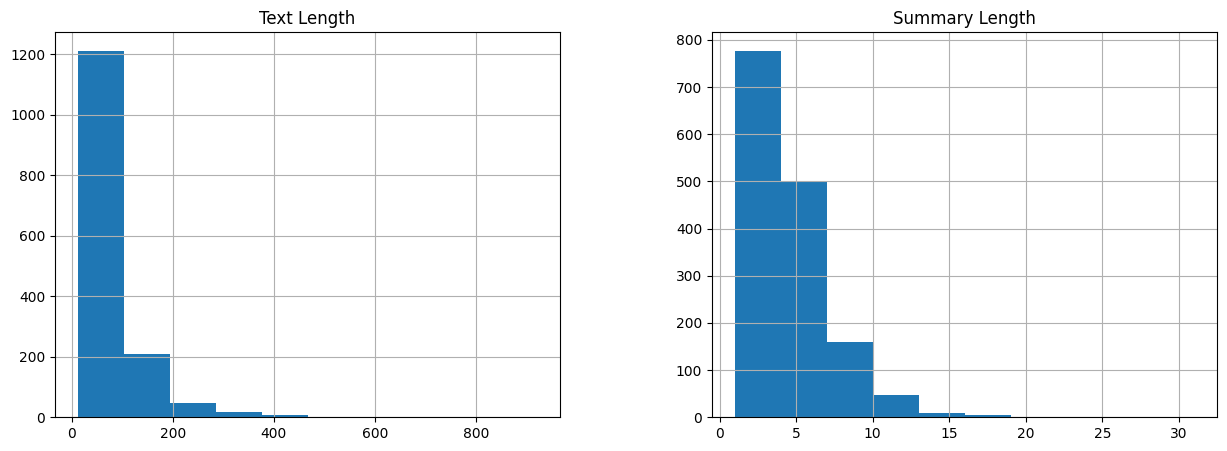

In [50]:
import pandas as pd

data = pd.DataFrame([text_len, summ_len]).T
data.columns = ['Text Length', 'Summary Length']

data.hist(figsize=(15, 5))

## Fine-Tuning

In [63]:
import torch
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [64]:
device = 'gpu'
model_checkpoint = 'Falconsai/text_summarization'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [87]:
def get_feature(batch):
    encodings = tokenizer(batch['Text'], text_target=batch['Summary'], max_length=512, truncation=True)

    encodings = {'input_ids': encodings['input_ids'], 'attention_mask': encodings['attention_mask'], 'labels': encodings['labels']}

    return encodings

In [88]:
data_pt = train_df.apply(get_feature, axis=1)

In [77]:
data_pt[0]

{'input_ids': [27,
  10315,
  1853,
  4132,
  9302,
  21563,
  6,
  27,
  21490,
  1853,
  329,
  9191,
  29846,
  4674,
  11300,
  24218,
  204,
  3,
  29084,
  4950,
  6,
  1853,
  476,
  3,
  3221,
  15258,
  26053,
  6,
  27,
  3,
  11425,
  4486,
  272,
  3577,
  8087,
  1853,
  20989,
  3765,
  272,
  8418,
  454,
  3291,
  910,
  3,
  21605,
  2990,
  11973,
  6,
  27,
  21490,
  71,
  272,
  8418,
  24218,
  3,
  12860,
  6,
  2344,
  180,
  18290,
  454,
  3291,
  3,
  6021,
  6892,
  2326,
  283,
  476,
  9664,
  19114,
  301,
  19406,
  272,
  476,
  21490,
  2365,
  1853,
  329,
  3388,
  8729,
  9697,
  3765,
  8145,
  8256,
  6,
  5055,
  27,
  6054,
  4486,
  3,
  21613,
  71,
  28283,
  427,
  71,
  5365,
  17161,
  1],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
 

In [89]:
import torch

for key, value in data_pt.items():
    if isinstance(value, dict):
        for sub_key, sub_value in value.items():
            data_pt[key][sub_key] = torch.tensor(sub_value, dtype=torch.long)
    else:
        data_pt[key] = torch.tensor(value, dtype=torch.long)

In [91]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'falconsai/amazonreview',
    num_train_epochs=4,
    warmup_steps=500,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    loggin_steps

)